# Prediction using Supervised ML

predict the Percentage(%) of marks that a Student is expected to score based on the number of studied hours

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_excel("student score prediction dataset.xlsx")

In [9]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

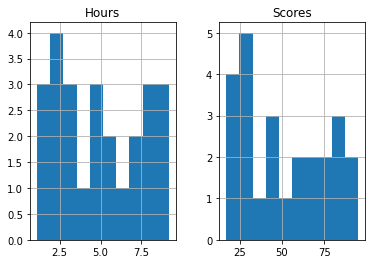

In [16]:
df.hist()

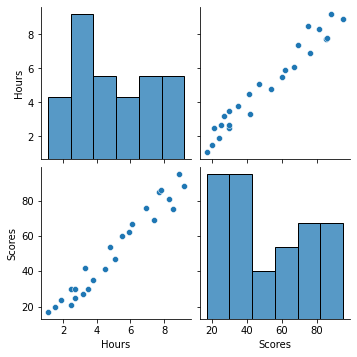

In [17]:
sns.pairplot(data)

<AxesSubplot:>

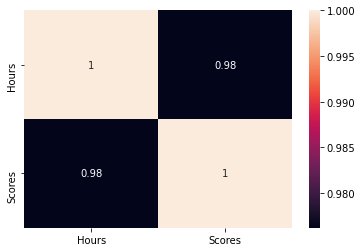

In [18]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='Hours'>

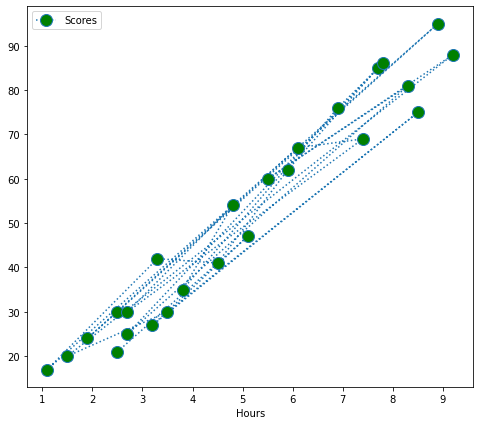

In [20]:
data.plot("Hours", "Scores", linestyle = ":", marker = "o", markersize = "12", markerfacecolor = "green", figsize = (8, 7))

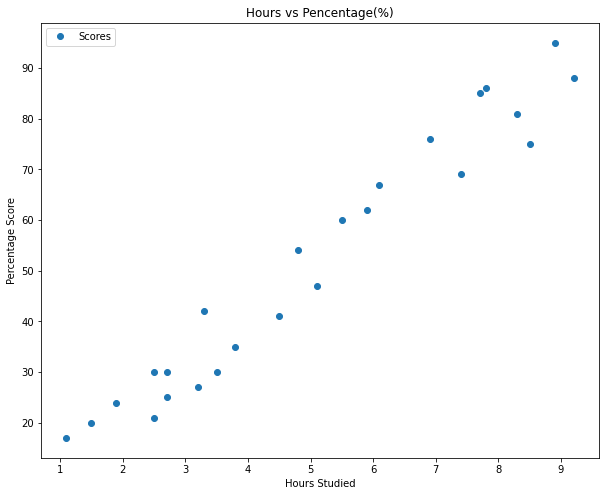

In [21]:
data.plot(x = 'Hours', y = 'Scores', style = 'o', figsize = (10, 8))
plt.title('Hours vs Pencentage(%)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop( "Hours", axis=1)
y = df[ "Hours"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (7, 1), (18,), (7,))

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

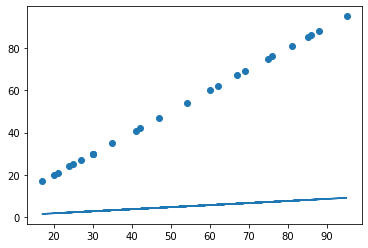

In [36]:
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [37]:
print(X_test)
Y_pred = regressor.predict(X_test)

    Scores
9       25
18      67
4       30
8       81
22      35
19      69
5       20


In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
9,2.7,2.355463
18,6.1,6.440306
4,3.5,2.841754
8,8.3,7.801920
22,3.8,3.328045
19,7.4,6.634822
5,1.5,1.869172


In [41]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = 0.8236472902097887


In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))

Mean Absolute Error: 0.4924962537462544
